<a href="https://colab.research.google.com/github/gobi2001-2006/computer-vision/blob/main/ADDING_NOISE_AND_REMOVED_BY_FILTER%2CSOBEL_OPERATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How it affects an image:
Mean (μ): Determines how the noise is centered (0 means no bias).
Standard Deviation (σ): Controls the strength of the noise (higher values make the noise more intense).
In the example you posted, the noise has:

Mean = 0 → Noise values are centered around 0, meaning no brightness shift.
Standard deviation = 50 → Noise intensity is moderate, making the image visibly noisy but still recognizable.

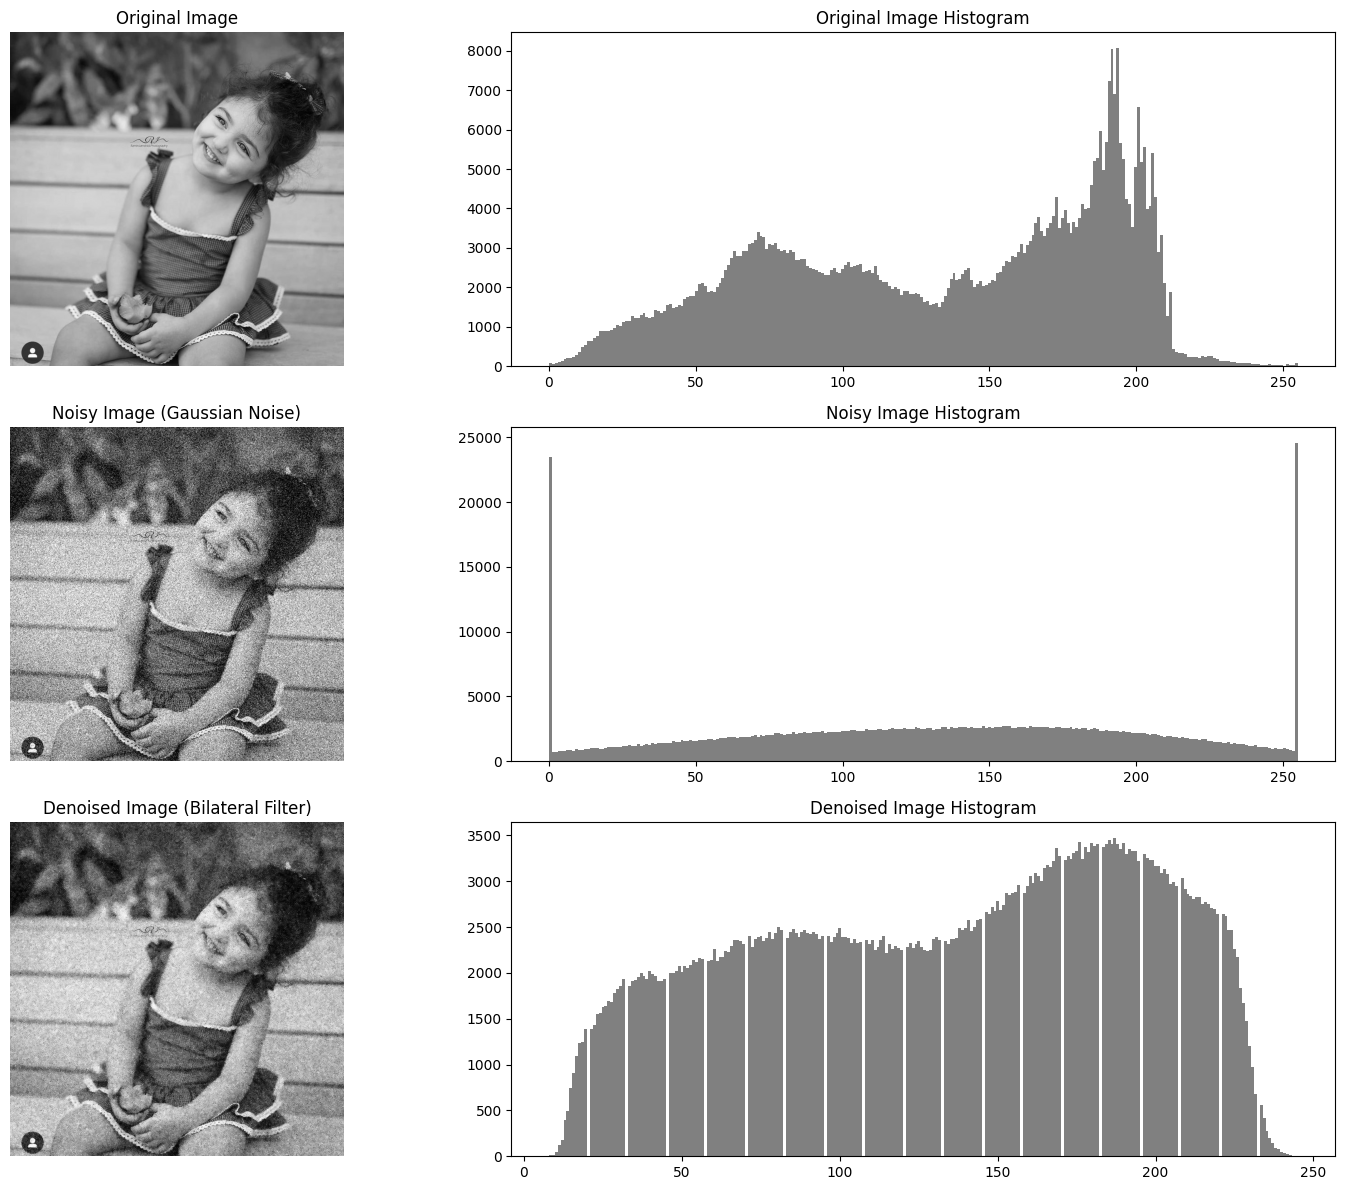

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

# Generate Gaussian noise
mean = 0
std = 50
noise = np.random.normal(mean, std, img.shape).astype(np.int16)

# Add noise to the image and clip to valid range [0, 255]
noise_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Apply bilateral filter for denoising
denoised_img = cv2.bilateralFilter(noise_img, 9, 50,50 )

plt.figure(figsize=(16, 12))


plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), bins=256, color='gray')
plt.title('Original Image Histogram')

# Noisy image and histogram
plt.subplot(3, 2, 3)
plt.imshow(noise_img, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(noise_img.ravel(), bins=256, color='gray')
plt.title('Noisy Image Histogram')

# Denoised image
plt.subplot(3, 2, 5)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image (Bilateral Filter)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(denoised_img.ravel(), bins=256, color='gray')
plt.title('Denoised Image Histogram')

plt.tight_layout()
plt.show()


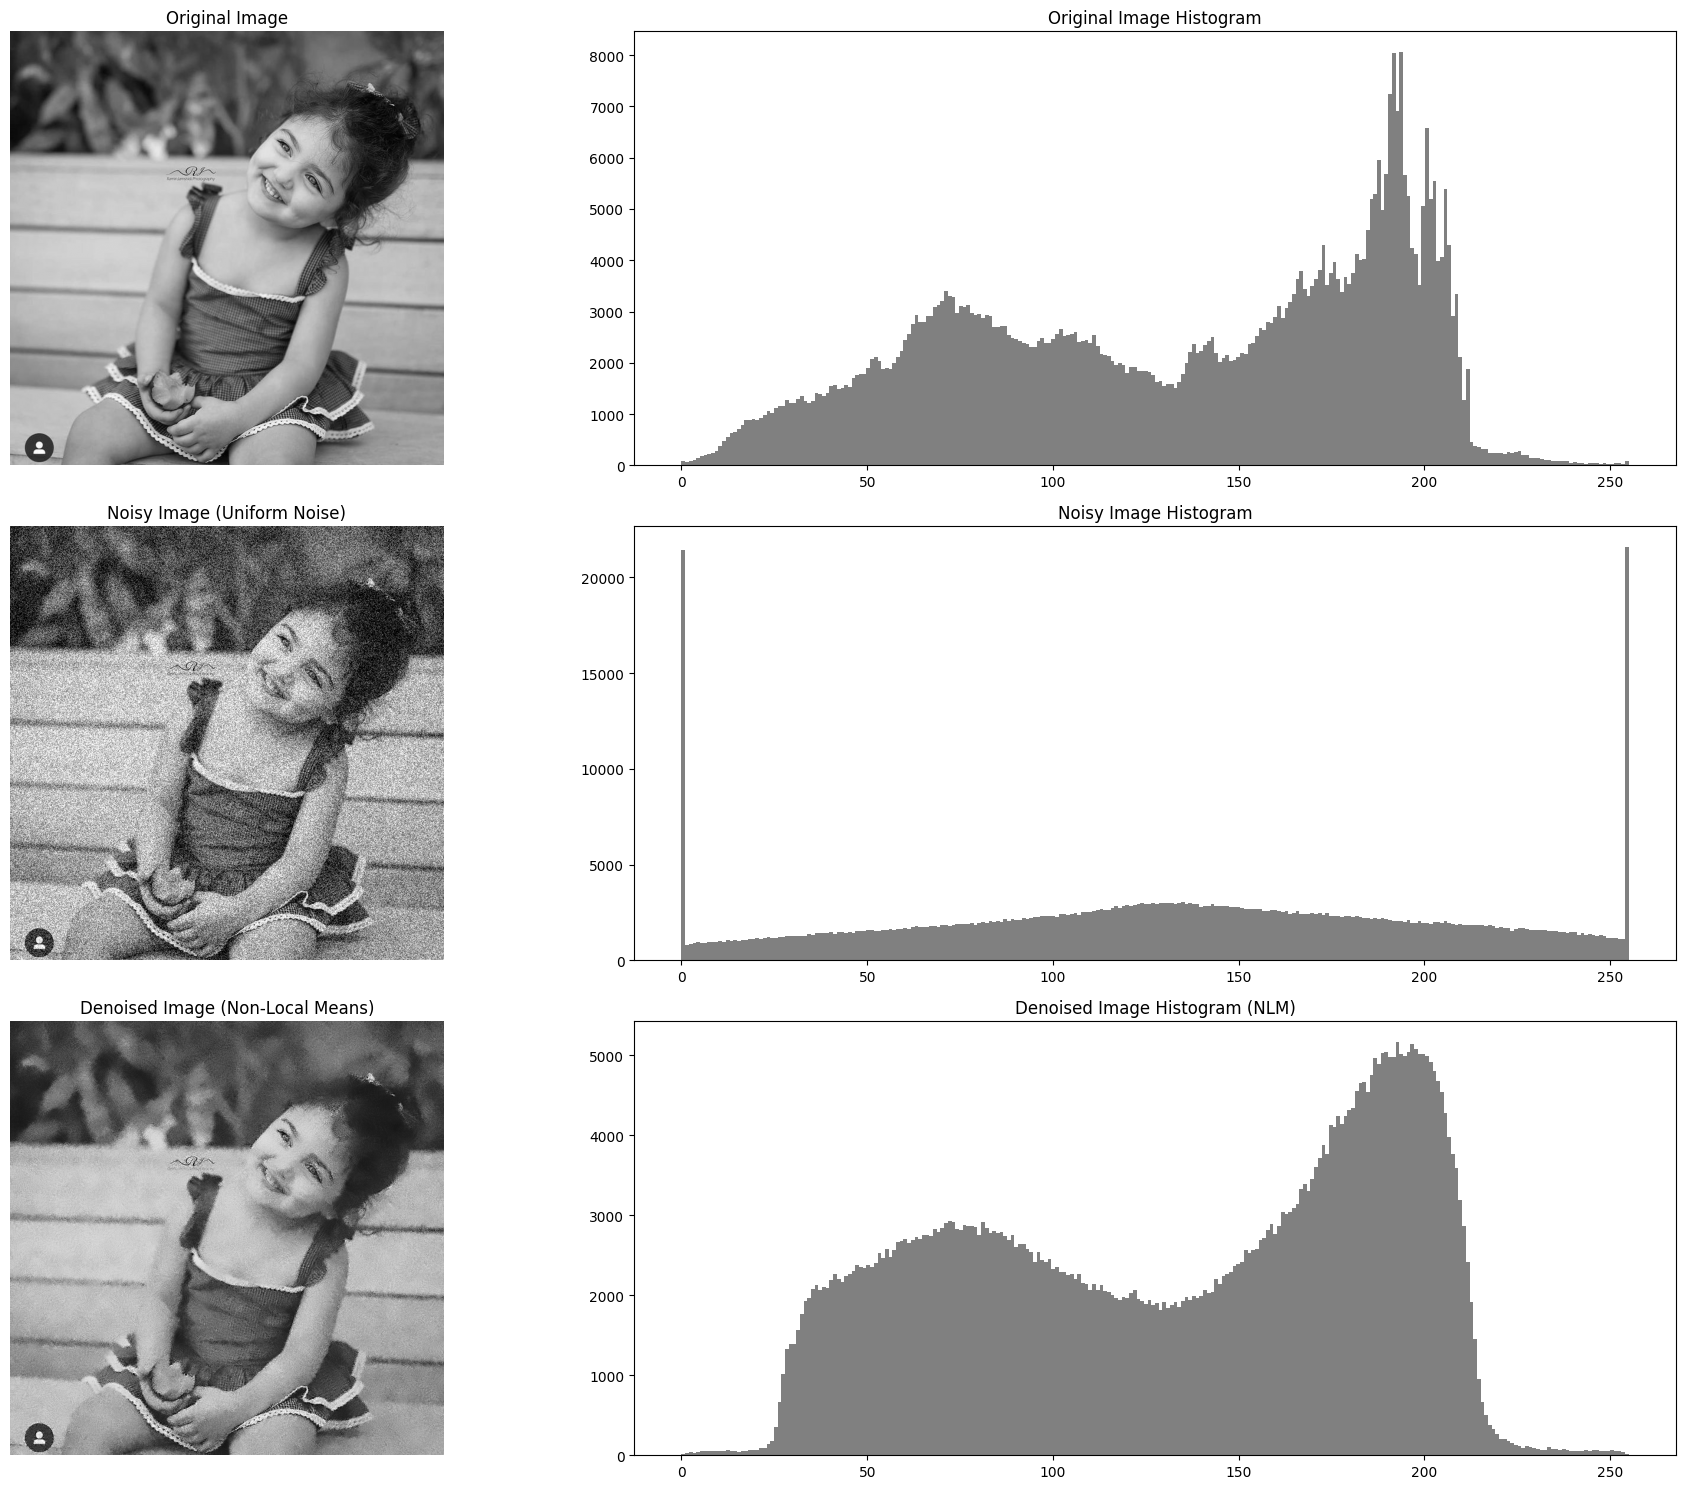

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

# Generate stronger uniform noise
noise = np.random.uniform(-80, 80, img.shape).astype(np.int16)
noise_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Apply Non-Local Means Denoising with a higher h value
denoised_nlm = cv2.fastNlMeansDenoising(noise_img, None, h=30, templateWindowSize=7, searchWindowSize=21)



# Plot the images and histograms
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), bins=256, color='gray')
plt.title('Original Image Histogram')

# Noisy image
plt.subplot(3, 2, 3)
plt.imshow(noise_img, cmap='gray')
plt.title('Noisy Image (Uniform Noise)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(noise_img.ravel(), bins=256, color='gray')
plt.title('Noisy Image Histogram')

# Non-Local Means Denoised Image
plt.subplot(3, 2, 5)
plt.imshow(denoised_nlm, cmap='gray')
plt.title('Denoised Image (Non-Local Means)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(denoised_nlm.ravel(), bins=256, color='gray')
plt.title('Denoised Image Histogram (NLM)')


plt.tight_layout()
plt.show()


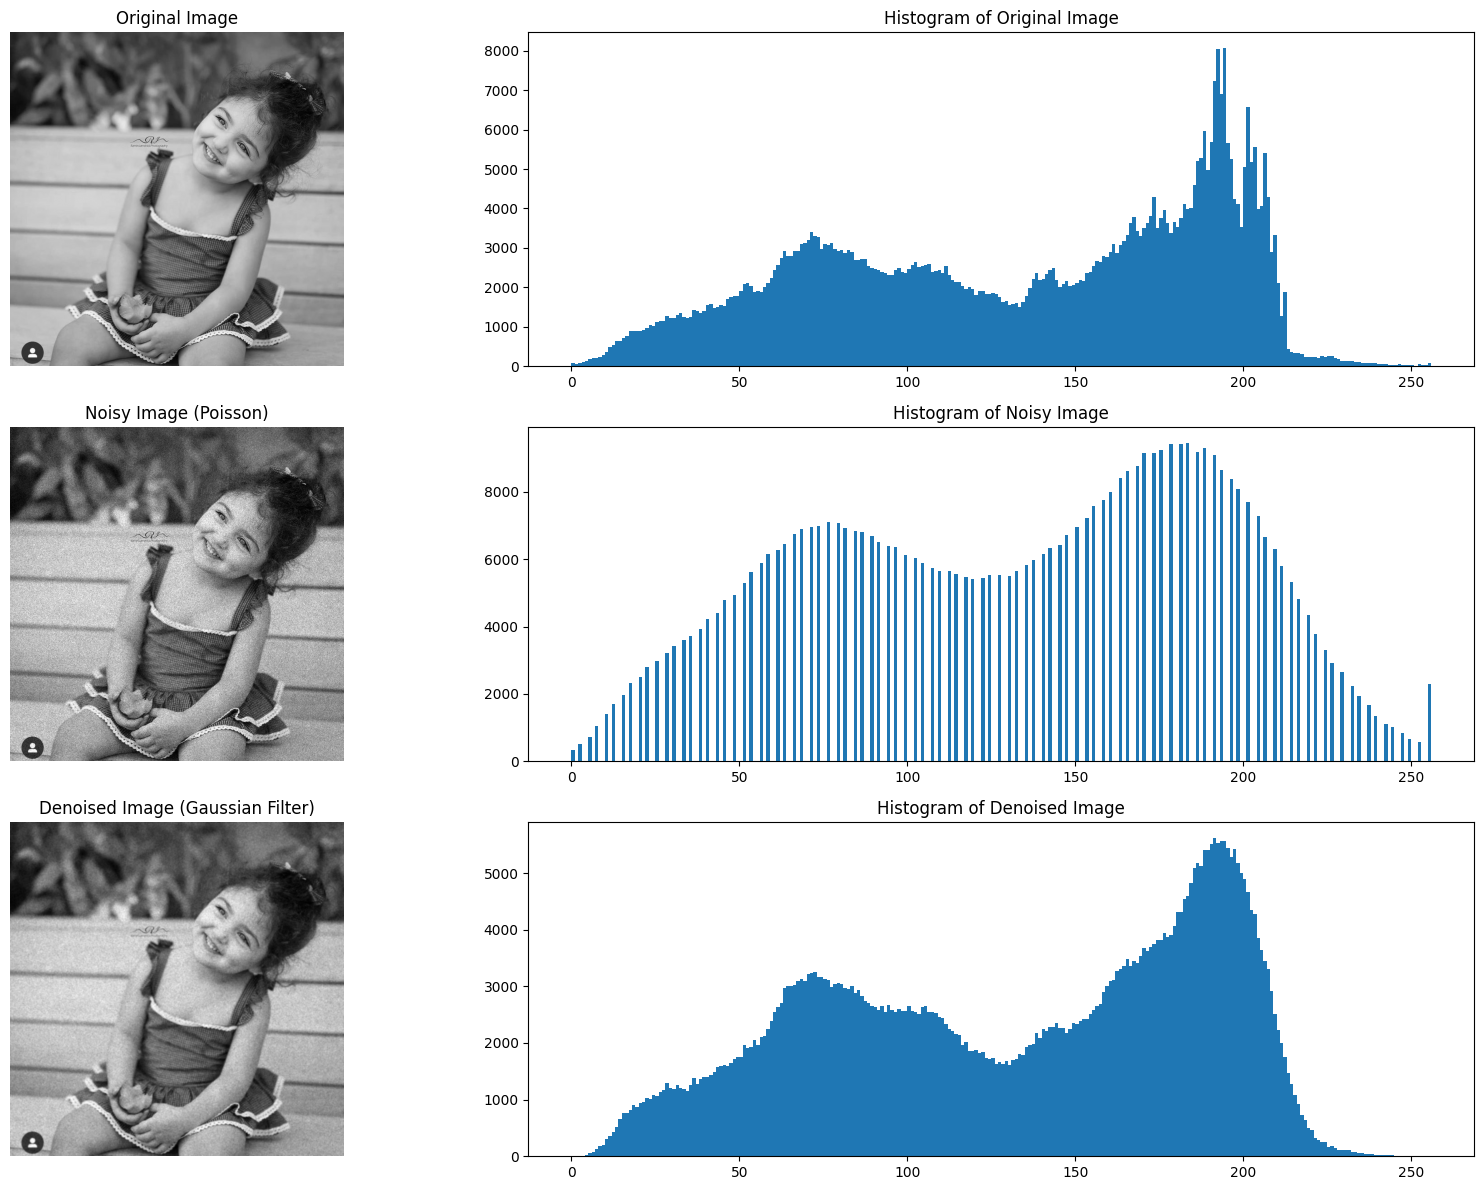

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

# Function to add Poisson noise
def add_poisson_noise(image):
    noisy = np.random.poisson(image.astype(np.float32) / 255.0 * 100.0) / 100.0 * 255.0
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Add Poisson noise
poisson_noisy_img = add_poisson_noise(img)

# Remove noise using Gaussian Filter
gaussian_denoised_img = cv2.GaussianBlur(poisson_noisy_img, (5, 5), 0)

# Plot the images and their histograms
plt.figure(figsize=(18, 12))

# Original Image and Histogram
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Original Image')

# Noisy Image (Poisson) and Histogram
plt.subplot(3, 2, 3)
plt.imshow(poisson_noisy_img, cmap='gray')
plt.title('Noisy Image (Poisson)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(poisson_noisy_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Noisy Image')

# Denoised Image (Gaussian Filter) and Histogram
plt.subplot(3, 2, 5)
plt.imshow(gaussian_denoised_img, cmap='gray')
plt.title('Denoised Image (Gaussian Filter)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(gaussian_denoised_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Denoised Image')

plt.tight_layout()
plt.show()


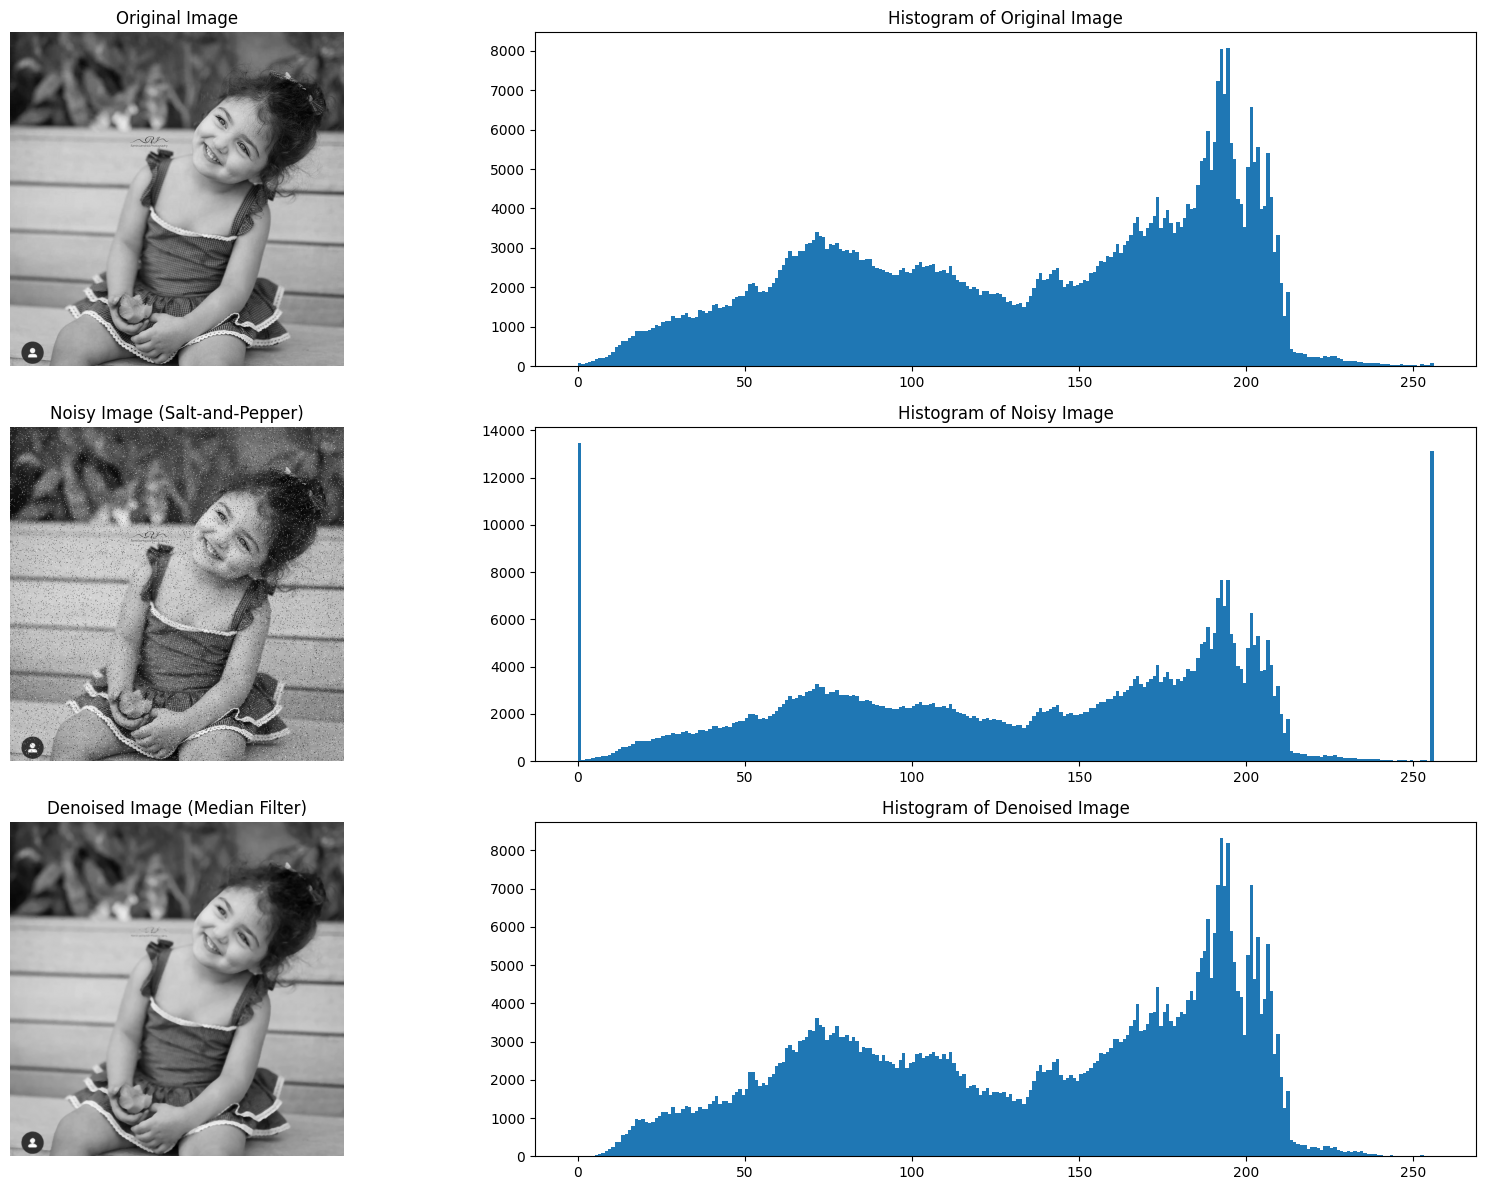

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

# Function to add Salt-and-Pepper noise
def add_salt_pepper_noise(image, prob=0.5):
    noisy = image.copy()
    num_salt = int(prob * image.size * 0.5)
    num_pepper = int(prob * image.size * 0.5)

    # Add salt noise (white pixels)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Add pepper noise (black pixels)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Apply salt-and-pepper noise
noisy_img = add_salt_pepper_noise(img, prob=0.05)

# Remove noise using Median Filter
denoised_img = cv2.medianBlur(noisy_img, 5)

# Plot the images and their histograms
plt.figure(figsize=(18, 12))

# Original Image and Histogram
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Original Image')

# Noisy Image and Histogram
plt.subplot(3, 2, 3)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(noisy_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Noisy Image')

# Denoised Image and Histogram
plt.subplot(3, 2, 5)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image (Median Filter)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(denoised_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Denoised Image')

plt.tight_layout()
plt.show()


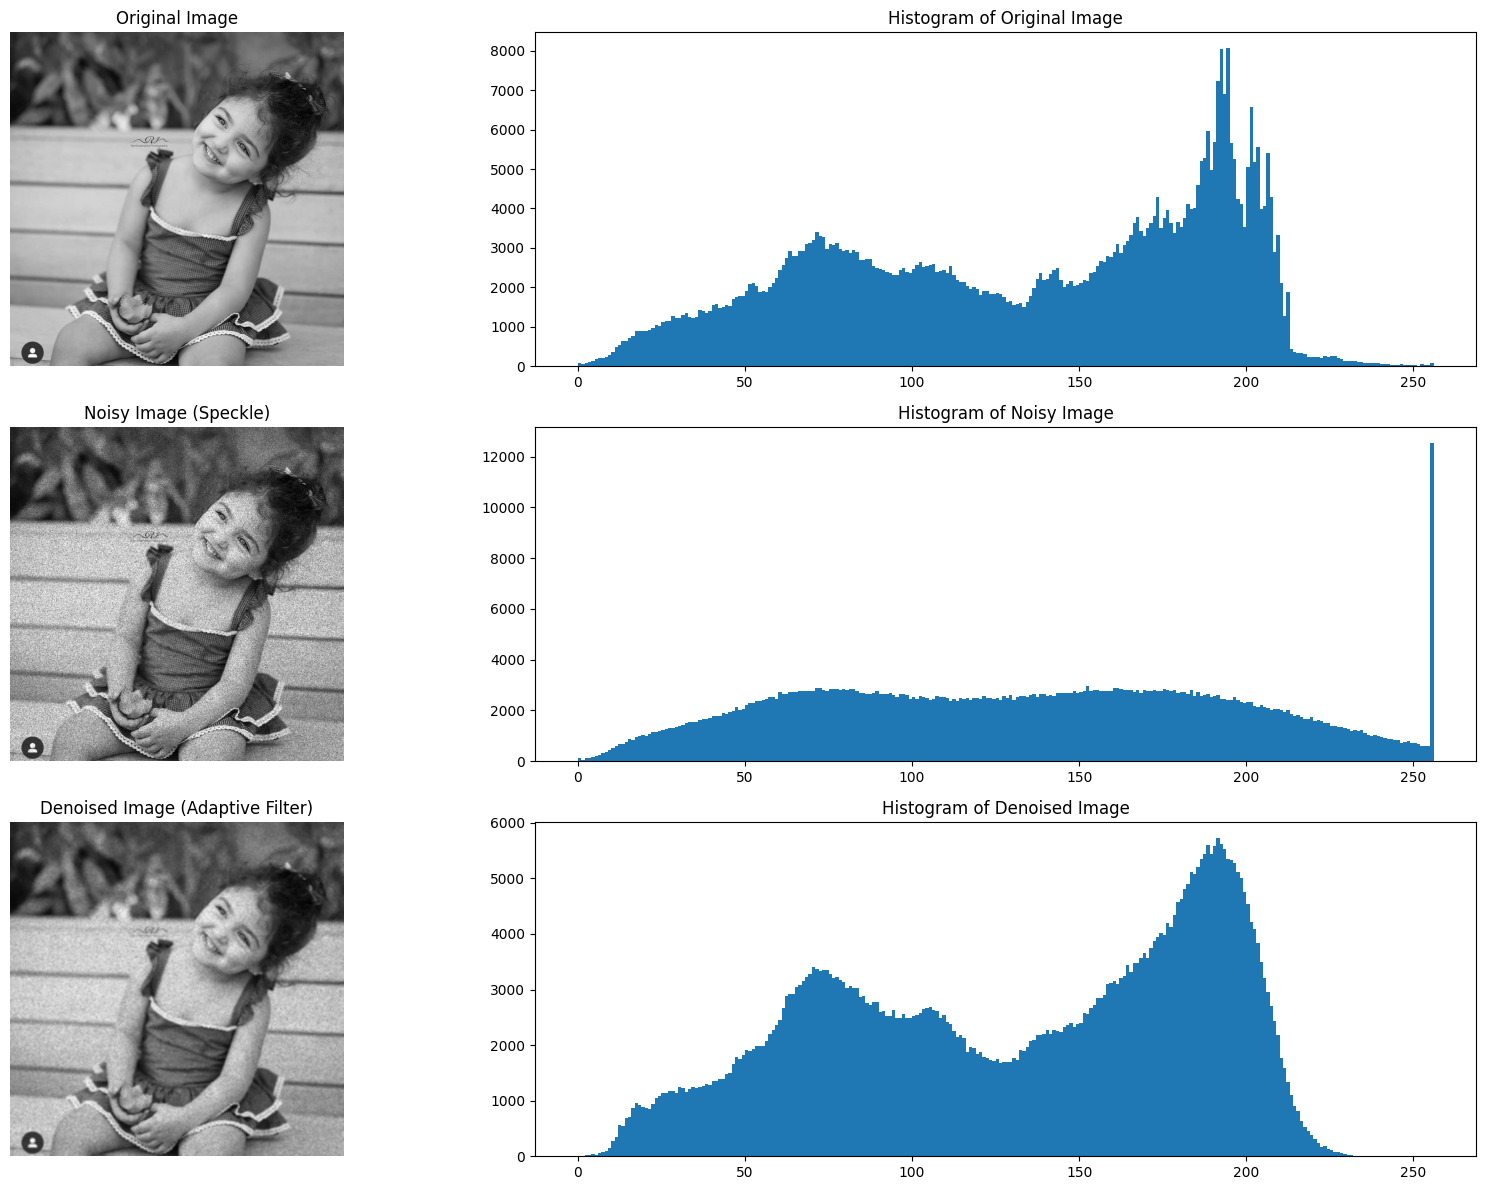

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

# Function to add Speckle noise
def add_speckle_noise(image):
    noise = np.random.randn(*image.shape) * 0.2
    noisy = image + image * noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Function to apply Adaptive Filter (Wiener-like filter for speckle noise)
def adaptive_filter(image, kernel_size=5):
    mean = cv2.boxFilter(image, cv2.CV_32F, (kernel_size, kernel_size))
    mean_sq = cv2.boxFilter(image**2, cv2.CV_32F, (kernel_size, kernel_size))
    variance = mean_sq - mean**2
    variance = np.maximum(variance, 0)
    noise_variance = np.mean(variance)

    adaptive_filtered = mean + (image - mean) * (variance / (variance + noise_variance))
    return np.clip(adaptive_filtered, 0, 255).astype(np.uint8)

# Add Speckle noise
speckle_noisy_img = add_speckle_noise(img)

# Apply Adaptive Filter
adaptive_filtered_img = adaptive_filter(speckle_noisy_img)

# Plot the images and histograms
plt.figure(figsize=(18, 12))

# Original Image and Histogram
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Original Image')

# Speckle Noisy Image and Histogram
plt.subplot(3, 2, 3)
plt.imshow(speckle_noisy_img, cmap='gray')
plt.title('Noisy Image (Speckle)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(speckle_noisy_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Noisy Image')

# Adaptive Filtered Image and Histogram
plt.subplot(3, 2, 5)
plt.imshow(adaptive_filtered_img, cmap='gray')
plt.title('Denoised Image (Adaptive Filter)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(adaptive_filtered_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Denoised Image')

plt.tight_layout()
plt.show()


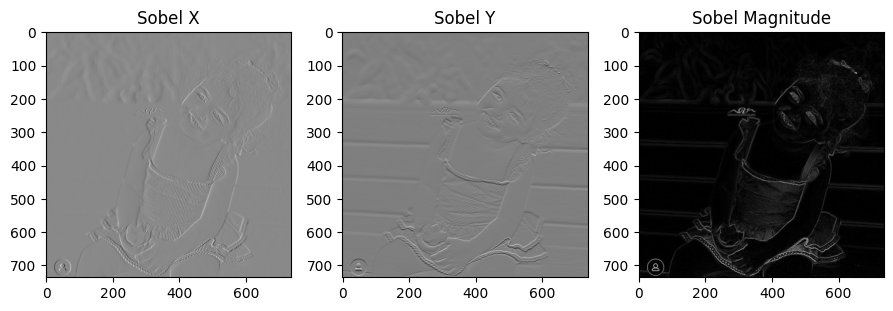

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("baby.jpg", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)


sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))

histogram, bins = np.histogram(sobel_magnitude.flatten(), bins=256, range=[0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1), plt.imshow(sobel_x, cmap="gray"), plt.title("Sobel X")
plt.subplot(1, 4, 2), plt.imshow(sobel_y, cmap="gray"), plt.title("Sobel Y")
plt.subplot(1, 4, 3), plt.imshow(sobel_magnitude, cmap="gray"), plt.title("Sobel Magnitude")



plt.tight_layout()
plt.show()
